In [12]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft
from scipy.ndimage import gaussian_filter

from modules import processing

In [6]:
PATH_TO_IMAGES = 'Y:\\Cathode\\LocalHVTest\\SpareMesh_2nd_230502\\NIKON'
noise_calibration_images = [cv2.imread(os.path.join(PATH_TO_IMAGES, 'NoiseCalibration', f), cv2.IMREAD_COLOR)[:,:,::-1] for f in ['DSC_2457.JPG', 'DSC_2458.JPG', 'DSC_2459.JPG', 'DSC_2460.JPG']]

In [7]:
processed = [processing.increase_brightness(processing.increase_contrast(gaussian_filter(img, sigma=0.1), clip_limit=100, tile_grid_size=(10, 10)), value=0) for img in noise_calibration_images]

In [13]:
fft_magnitudes_gray = [np.abs(scipy.fft.fft(processing.standard_scale(cv2.cvtColor(p, cv2.COLOR_RGB2GRAY).flatten()))[1:p.shape[0]*p.shape[1]//2]) for p in processed]
fft_magnitudes_r = [np.abs(scipy.fft.fft(processing.standard_scale(p[:,:,0].flatten()))[1:p.shape[0]*p.shape[1]//2]) for p in processed]
fft_magnitudes_g = [np.abs(scipy.fft.fft(processing.standard_scale(p[:,:,1].flatten()))[1:p.shape[0]*p.shape[1]//2]) for p in processed]
fft_magnitudes_b = [np.abs(scipy.fft.fft(processing.standard_scale(p[:,:,2].flatten()))[1:p.shape[0]*p.shape[1]//2]) for p in processed]
fft_x = [1./i for i in range(1, len(fft_magnitudes_gray[0])+1)]
print(fft_magnitudes_gray[0].shape)

(10334207,)


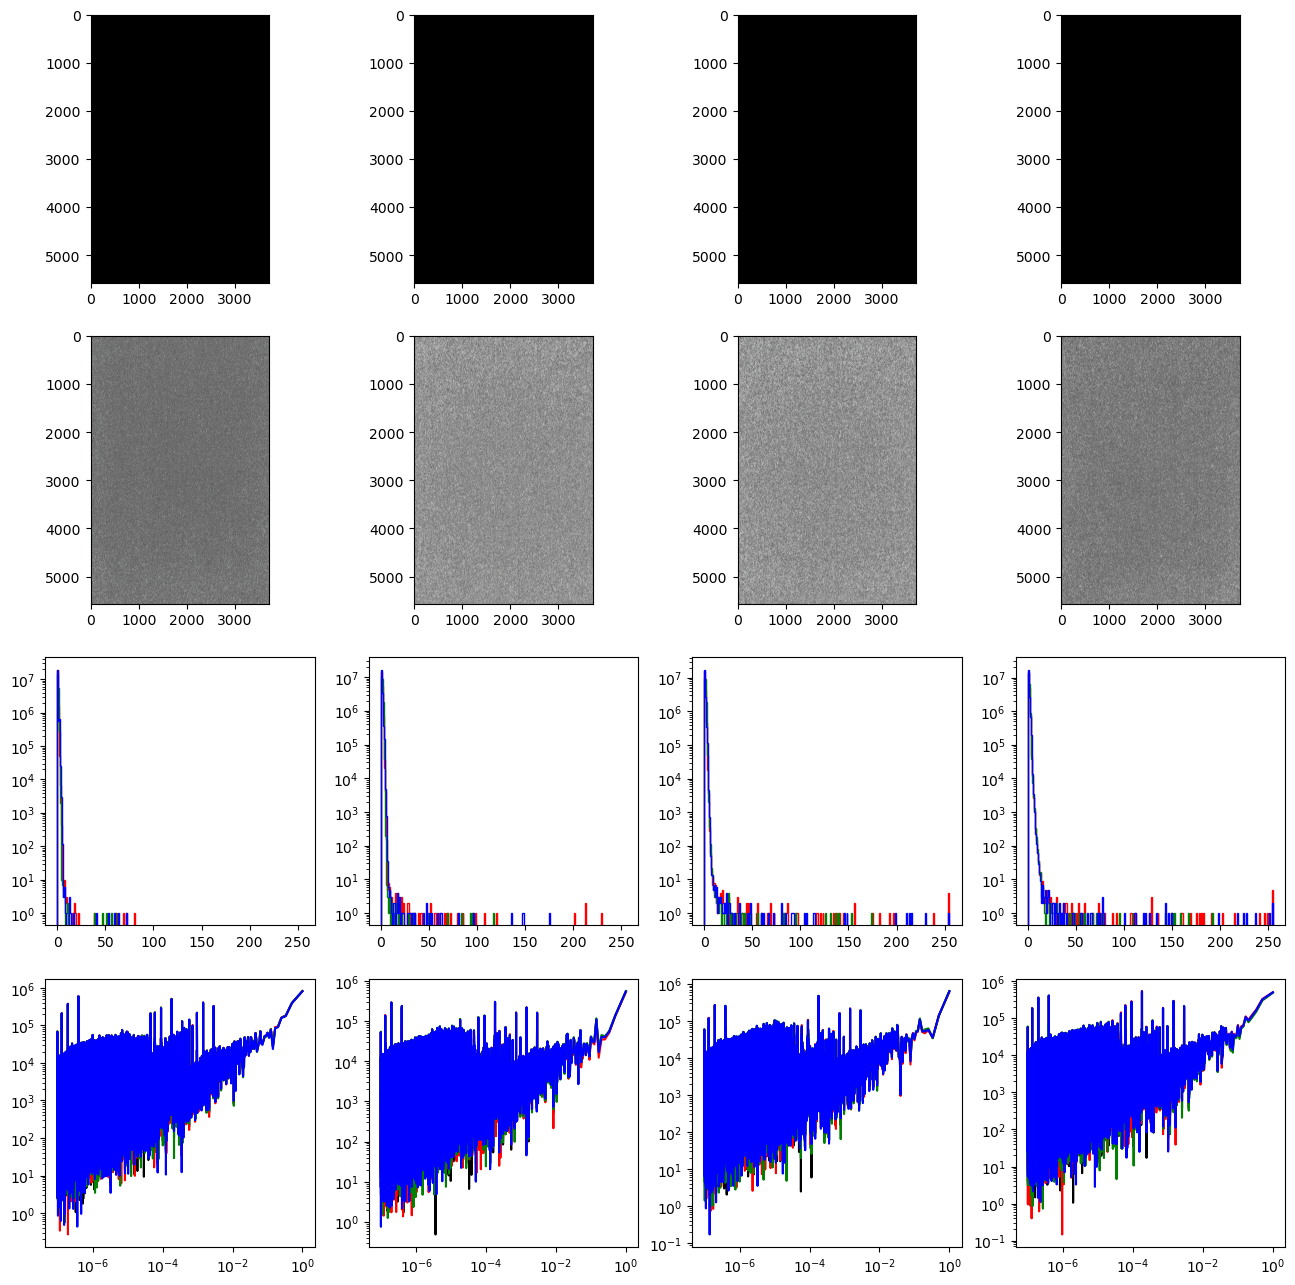

In [14]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
bins = np.linspace(0, 255, 256)
for i, img in enumerate(noise_calibration_images):
    ax[0][i].imshow(noise_calibration_images[i])
    ax[1][i].imshow(processed[i])
    ax[2][i].hist(noise_calibration_images[i][:,:,0].flatten(), histtype='step', density=False, bins=bins, color='red')
    ax[2][i].hist(noise_calibration_images[i][:,:,1].flatten(), histtype='step', density=False, bins=bins, color='green')
    ax[2][i].hist(noise_calibration_images[i][:,:,2].flatten(), histtype='step', density=False, bins=bins, color='blue')
    ax[2][i].set_yscale('log')
    ax[3][i].plot(fft_x, fft_magnitudes_gray[i], color='black')
    ax[3][i].plot(fft_x, fft_magnitudes_r[i], color='red')
    ax[3][i].plot(fft_x, fft_magnitudes_g[i], color='green')
    ax[3][i].plot(fft_x, fft_magnitudes_b[i], color='blue')
    ax[3][i].set_xscale('log')
    ax[3][i].set_yscale('log')
plt.show()